In [ ]:
import numpy as np       
import pandas as pd       
import matplotlib.pyplot as plt   # for data visualisation
import itertools
import re   # for string operations

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split    # train test split
# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
# transforming text into numerical format
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/train.csv")
df1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train1, test1 = train_test_split(df1, test_size=0.2, stratify=df1.label)


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/news.csv")
df2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# encoding the target variable into numerical format
encoder = {'label': {'FAKE':1, 'REAL':0}}
df2 = df2.replace(encoder)

In [ ]:
train2, test2 = train_test_split(df2, test_size=0.2, stratify=df2.label)

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/FA-KES-Dataset.csv',encoding='latin')
df3.rename(columns={'article_title':'title', 'article_content':'text'}, inplace=True)
df3.head() # 0 means FAKE news and 1 means TRUE news in this this dataset


,unit_id,title,text,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [ ]:
# creating new target variable so that FAKE news are represented by 1 and TRUE news by 0
df3['label'] = df3['labels'].apply(lambda x: 1 if x==0 else 0)

In [ ]:

train3, test3 = train_test_split(df3, test_size=0.2, stratify=df3.label)

In [ ]:
fake_news = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true_news = pd.read_csv('/content/drive/MyDrive/True.csv')

In [ ]:
# creating labels
fake_news['label'] = 1
true_news['label'] = 0

# Mixing fake and true datasets
df4 = pd.concat([true_news,fake_news])
df4 = df4.sample(frac=1).reset_index(drop=True)
     

In [ ]:

df4.head()

,title,text,subject,date,label
0,YIKES! Is Something Big About To Happen? Miche...,Michelle Obama has scrubbed any reference to H...,politics,"Nov 1, 2016",1
1,Factbox - How Carlos Danger got tangled up in ...,"NEW YORK (Reuters) - Anthony Weiner, the disgr...",politicsNews,"October 29, 2016",0
2,Japan PM stresses importance of TPP trade pact...,NEW YORK (Reuters) - Japanese Prime Minister S...,politicsNews,"September 20, 2016",0
3,OOPS! Secret Service Opens Investigation After...,A spokesman for the Secret Service told The Ga...,politics,"Jan 21, 2017",1
4,PARTY CORRUPTION: Clinton Campaign Directly Ti...,21st Century Wire says A tidal wave of revelat...,US_News,"October 31, 2016",1


In [ ]:
train4, test4 = train_test_split(df4, test_size=0.2, stratify=df4.label)

Mergeing all the train datasets

In [ ]:


train = pd.concat([train1.loc[:,['title','text','label']],
                  train2.loc[:,['title','text','label']],
                  train3.loc[:,['title','text','label']],
                  train4.loc[:,['title','text','label']]])

In [ ]:
# checking null values
train.isna().sum()

title    444
text      33
label      0
dtype: int64

In [ ]:

# removing null values
train.dropna(inplace=True)
     

In [ ]:
# Checking for duplicate values
len(train[train.duplicated()])

5412

In [ ]:

# removing duplicated values
train.drop_duplicates(inplace=True)

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)

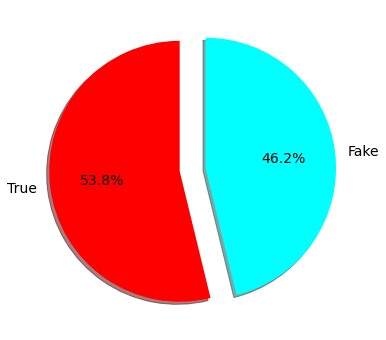

In [ ]:
# Checking if our data is well balanced
plt.figure(figsize=(9,6))
plt.pie(train['label'].value_counts(),explode=[0.1,0.1],colors=['red','cyan'],startangle=90,shadow=True,labels=['True','Fake'],autopct='%1.1f%%',textprops={'fontsize': 14});
     

In [ ]:

# removing the commoner inflexional endings from words in English
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

stop_words = stopwords.words('english')
text_cleaning_re = '[^a-zA-Z]'
     

In [ ]:
# function for text processing
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()     # use re package to removing everything that is not in letter
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
# text processing
train['text'] = train['text'].apply(lambda x: preprocess(x))
train['text'].head()

0    change graphic courtesy atlantic highlights di...
1    media bias become mental illness media bias be...
2    vatican city reuters pope francis urged u pres...
3    lincoln october standing rock sioux tribe cont...
4    later week pope francis reportedly make moral ...
Name: text, dtype: object

In [ ]:

X = train.text.values           # independent variable
y = train.label.values          # dependent variable

In [ ]:
# splitting the dataset into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)
     

In [ ]:
# transform our textual X to numerical so that our ML model can understand it and can work with it
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3),max_df=0.7)

tfidf_train = tfidf_v.fit_transform(X_train).toarray()
tfidf_val = tfidf_v.transform(X_val).toarray()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     


RandomForest Classifier
Hyperparameter tuning

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=50, min_samples_leaf=46)
rf_clf.fit(tfidf_train,y_train)
tr_preds = rf_clf.predict(tfidf_train)  # predicting train
preds = rf_clf.predict(tfidf_val)       # predicting validation

In [ ]:
print('Train accuracy:',accuracy_score(y_train, tr_preds))
print('Validation accuracy:',accuracy_score(y_val, preds))

Train accuracy: 0.8593213058419243
Validation accuracy: 0.854524627720504


In [ ]:
# train classification report for RandomForest
print(classification_report(y_train,tr_preds))
     

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     22544
           1       0.94      0.74      0.83     19360

    accuracy                           0.86     41904
   macro avg       0.88      0.85      0.86     41904
weighted avg       0.87      0.86      0.86     41904



In [ ]:
# validation classification report for RandomForest
print(classification_report(y_val,preds))
     

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5636
           1       0.94      0.74      0.82      4840

    accuracy                           0.85     10476
   macro avg       0.87      0.85      0.85     10476
weighted avg       0.87      0.85      0.85     10476



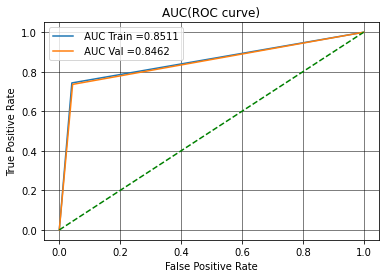

In [ ]:

# train and validation ROC-AUC curve for RandomForest

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, tr_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_val, preds)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC Train ="+str(auc(train_fpr, train_tpr).round(4)))
plt.plot(test_fpr, test_tpr, label=" AUC Val ="+str(auc(test_fpr, test_tpr).round(4)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion matrix, without normalization


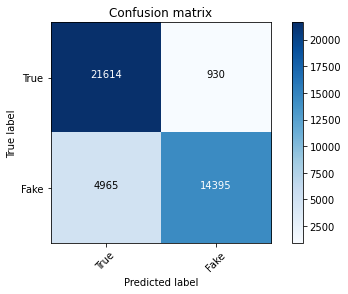

In [ ]:

# train confusion matrix for RandomForest
cm_train = confusion_matrix(y_train,tr_preds)
plot_confusion_matrix(cm_train,classes=['True','Fake'])

Confusion matrix, without normalization


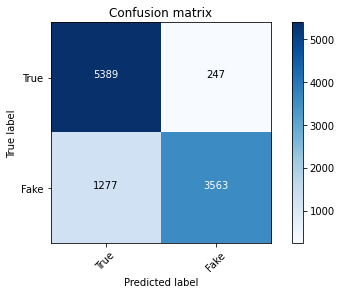

In [ ]:
# validation confusion matrix for RandomForest
cm_test = confusion_matrix(y_val,preds)
plot_confusion_matrix(cm_test,classes=['True','Fake'])

Logistic Regression
Hyperparameter tuning

In [ ]:

lr = LogisticRegression(C=2, max_iter=10000)
lr.fit(tfidf_train,y_train)
tr_preds = lr.predict(tfidf_train)
preds = lr.predict(tfidf_val)

In [ ]:

print('Train accuracy:',accuracy_score(y_train, tr_preds))
print('Validation accuracy:',accuracy_score(y_val, preds))
     

Train accuracy: 0.9591685757922871
Validation accuracy: 0.9392898052691867


In [ ]:

print(classification_report(y_train, tr_preds))       # train

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22544
           1       0.96      0.95      0.96     19360

    accuracy                           0.96     41904
   macro avg       0.96      0.96      0.96     41904
weighted avg       0.96      0.96      0.96     41904



In [ ]:

print(classification_report(y_val, preds))     # validation

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5636
           1       0.94      0.93      0.93      4840

    accuracy                           0.94     10476
   macro avg       0.94      0.94      0.94     10476
weighted avg       0.94      0.94      0.94     10476



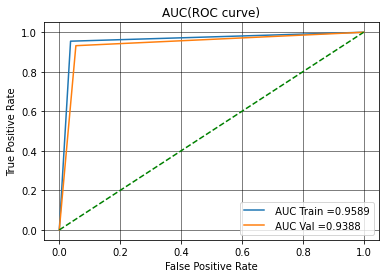

In [ ]:
# train and validation ROC-AUC curve for Logistic Regression
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, tr_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_val, preds)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC Train ="+str(auc(train_fpr, train_tpr).round(4)))
plt.plot(test_fpr, test_tpr, label=" AUC Val ="+str(auc(test_fpr, test_tpr).round(4)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion matrix, without normalization


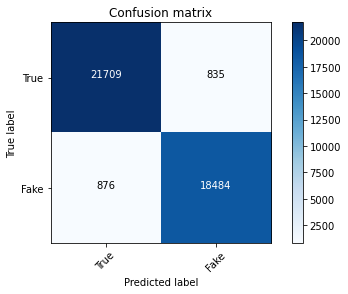

In [ ]:
# train confusion matrix for Logistic Regession
cm_train = confusion_matrix(y_train,tr_preds)
plot_confusion_matrix(cm_train,classes=['True','Fake'])
     

Confusion matrix, without normalization


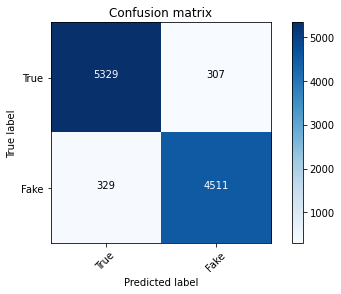

In [ ]:
# validation confusion matrix for Logistic Regession
cm_test = confusion_matrix(y_val,preds)
plot_confusion_matrix(cm_test,classes=['True','Fake'])

Testing on different datasets
test1

In [ ]:
test1 = test1.dropna().reset_index(drop=True)
X1 = test1.title.values
X1_tfidf = tfidf_v.transform(X1).toarray()
test1['label_rf'] = rf_clf.predict(X1_tfidf)       # RandomForest model
test1['label_lr'] = lr.predict(X1_tfidf)           # Logistic Regression model
test1.head(10)

,id,title,author,text,label,label_rf,label_lr
0,9747,"Comment on After Sweeping Election, First Thin...",Debbie Menon,Dispatches from Wolf Country –Sitting in my ca...,1,1,1
1,2081,Health experts share the top home remedies for...,Amy Goodrich,Health experts share the top home remedies for...,1,1,1
2,1764,Trump to Paul Ryan: Get NATO to ’Pay Their Bil...,Pam Key,"Tuesday in Kenosha, WI at the world headquarte...",0,1,1
3,8193,How Putin Derailed the West : Information,informationclearinghouse.info,How Putin Derailed the West\nBy Mike Whitney ...,1,1,1
4,7898,Introducing The Upshot’s Presidential Predicti...,Josh Katz,"For now, at least, Hillary Clinton has a 76 pe...",0,1,1
5,5412,The Working Class Won The Election — Paul Crai...,pcr3,The Working Class Won The Election\nPaul Craig...,1,1,1
6,11112,A Majority Agreed She Was Raped by a Stanford ...,Joe Drape and Marc Tracy,"At Stanford University, in a conference room a...",0,0,0
7,4382,Most Idiotic Comment Ever? “Sell Gold Because ...,admin,"Financial Markets , Gold , Market Manipulation...",1,1,1
8,15908,Two Groups Scuffle Amid Art Inside a Minneapol...,Randy Kennedy,"Francis Henry Taylor, a director of the Metrop...",0,0,0
9,8768,War In The Matrix — How Our Minds Are Programm...,noreply@blogger.com (Alexander Light),. War In The Matrix — How Our Minds Are Progra...,1,1,1


In [ ]:

accuracy_score(test1.label,test1.label_rf)    # RandomForest model

0.5157232704402516

In [ ]:
print(classification_report(test1.label,test1.label_rf))    # RandomForest model
     

              precision    recall  f1-score   support

           0       0.85      0.18      0.29      2071
           1       0.47      0.96      0.63      1586

    accuracy                           0.52      3657
   macro avg       0.66      0.57      0.46      3657
weighted avg       0.68      0.52      0.44      3657



Confusion matrix, without normalization


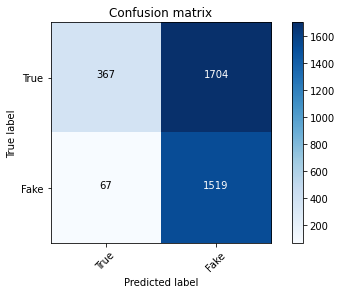

In [ ]:
cm1_rf = confusion_matrix(test1.label,test1.label_rf)       # RandomForest model
plot_confusion_matrix(cm1_rf,classes=['True','Fake'])

In [ ]:

accuracy_score(test1.label,test1.label_lr)      # Logistic Regression model

0.6179928903472792

In [ ]:
print(classification_report(test1.label,test1.label_lr))    # Logistic Regression model

              precision    recall  f1-score   support

           0       0.96      0.34      0.50      2071
           1       0.53      0.98      0.69      1586

    accuracy                           0.62      3657
   macro avg       0.75      0.66      0.60      3657
weighted avg       0.77      0.62      0.58      3657



Confusion matrix, without normalization


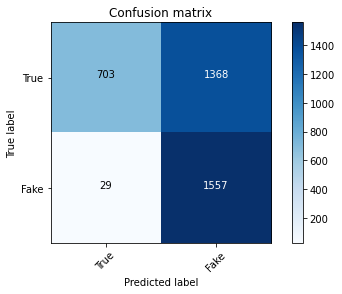

In [ ]:
cm1_lr = confusion_matrix(test1.label,test1.label_lr)     # Logistic Regression model
plot_confusion_matrix(cm1_lr,classes=['True','Fake'])

Test 2

In [ ]:

test2 = test2.dropna().reset_index(drop=True)
X2 = test2.text.values
X2_tfidf = tfidf_v.transform(X2).toarray()
test2['label_rf'] = rf_clf.predict(X2_tfidf)      # RandomForest model
test2['label_lr'] = lr.predict(X2_tfidf)          # Logistic Regression model
test2.head(10)

,Unnamed: 0,title,text,label,label_rf,label_lr
0,2404,The most predictable disaster in the history o...,"Ask him, and he'll tell you himself. ""I'm very...",0,0,1
1,5777,Fox News Just Exposed Hillary’s ILLEGAL VOTING...,Home / News / Fox News Just Exposed Hillary’s ...,1,1,1
2,6027,Do You Know What It Means To Be An Introvert?,Leave a reply \nKate Bartolotta – In this day ...,1,1,1
3,8500,Comment on Chicago Tribune: Hillary Clinton sh...,"Posted on October 30, 2016 by Dr. Eowyn | 12 C...",1,0,1
4,844,"Cruz, Kasich campaign announce collaboration t...",The presidential campaigns of Texas Sen. Ted C...,0,0,0
5,7806,Comment on Jury Finds Woman NOT Guilty of ‘Man...,Jury Nullification!!! Live it….Love it…..Learn...,1,0,1
6,8367,November 8 Is (Finally) Here: An Abridged Elec...,By Common Dreams After a national election sea...,1,1,1
7,9985,Half Of Russians Fear Syria Could Spark WW3,Half Of Russians Fear Syria Could Spark WW3 11...,1,0,1
8,6449,Has George Soros Committed Treason?,Has George Soros Committed Treason?\n“His only...,1,0,1
9,6950,"At DAPL, Confiscating Cameras as Evidence of J...",Reprinted from fair.org by Janine Jackson Mili...,1,0,1


In [ ]:
accuracy_score(test2.label,test2.label_rf)      # RandomForest model

0.7142857142857143

In [ ]:
print(classification_report(test2.label,test2.label_rf))      # RandomForest model
     

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       634
           1       0.77      0.62      0.68       633

    accuracy                           0.71      1267
   macro avg       0.72      0.71      0.71      1267
weighted avg       0.72      0.71      0.71      1267



Confusion matrix, without normalization


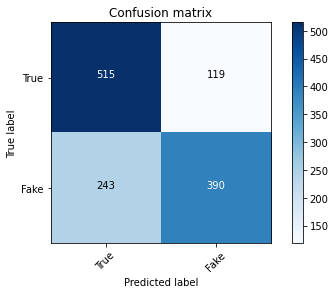

In [ ]:

cm2_rf = confusion_matrix(test2.label,test2.label_rf)       # RandomForest model
plot_confusion_matrix(cm2_rf,classes=['True','Fake'])

In [ ]:
accuracy_score(test2.label,test2.label_lr)      # Logistic Regression model

0.8697711128650355

In [ ]:
print(classification_report(test2.label,test2.label_lr))      # Logistic Regression model
     

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       634
           1       0.82      0.95      0.88       633

    accuracy                           0.87      1267
   macro avg       0.88      0.87      0.87      1267
weighted avg       0.88      0.87      0.87      1267



Confusion matrix, without normalization


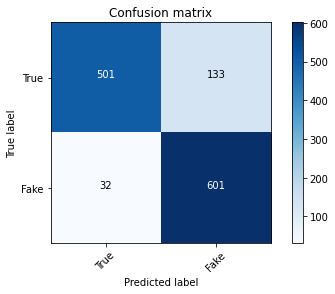

In [ ]:

cm2_lr = confusion_matrix(test2.label,test2.label_lr)     # Logistic Regression model
plot_confusion_matrix(cm2_lr,classes=['True','Fake'])
     

Test 3

In [ ]:

test3 = test3.dropna().reset_index(drop=True)
test3.drop('labels', axis=1, inplace=True)
X3 = test3.text.values
X3_tfidf = tfidf_v.transform(X3).toarray()
test3['label_rf'] = rf_clf.predict(X3_tfidf)      # RandomForest model
test3['label_lr'] = lr.predict(X3_tfidf)          # Logistic Regression model
test3.head(10)

,unit_id,title,text,source,date,location,label,label_rf,label_lr
0,1962495698,Twin Bomb Attacks Kill 50 Injure Dozens in Syr...,Sun Feb 21 2016 Twin Bomb Attacks Kill 50 Inju...,alalam,2/16/2016,homs,0,0,0
1,1926479096,18 Civilians Killed in Barrel Bomb Attack on R...,Wednesday 22 July 2015 22:33 18 Civilians Kill...,etilaf,7/22/2015,aleppo,1,0,0
2,1965495387,At Least 27 Children Killed in Syrian Idlib At...,06.04.2017 The attack in Syrian Idlib province...,sputnik,4/6/2017,idlib,0,0,1
3,1965495374,Center of Damascus Shelled 2 Civilians Killed ...,16.04.2017Get short URL 0 612 A woman and chil...,sputnik,4/16/2017,damascus,0,0,1
4,1926479120,Assad Regime Escalates Attacks on Besieged Alw...,Monday 07 November 2016 19:02 Assad Regime Esc...,etilaf,11/7/2016,homs,0,0,0
5,1924058153,Airstrikes by Assad regime warplanes kill 4 in...,Published April 29 2017 At least four people w...,dailysabah,4/16/2017,idlib,0,0,0
6,1962495700,Syrian Army Kills over 100 ISIS Terrorists in ...,Sun Feb 14 2016 Syrian Army Kills over 100 ISI...,alalam,2/14/2016,deir ezzor,0,0,1
7,1962495666,Daesh Terrorist Group Execute 70 Members in Raqqa,Mon Jul 11 2016 Daesh Terrorist Group Execute ...,alalam,7/11/2016,raqqa,0,0,0
8,1924058151,Assad regime targets civilians in Homs airstrikes,Published April 24 2017 Assad regime forces ha...,dailysabah,4/17/2017,homs,0,0,0
9,1965511159,Syria Civilian Killed Others Injured in Mortar...,27-07-2015 Syria Civilian Killed Others Injure...,manar,7/27/2015,damascus,1,0,0


In [ ]:
accuracy_score(test3.label,test3.label_rf)      # RandomForest model

0.5217391304347826

In [ ]:
print(classification_report(test3.label,test3.label_rf))      # RandomForest model
     

              precision    recall  f1-score   support

           0       0.53      0.94      0.68        85
           1       0.44      0.05      0.09        76

    accuracy                           0.52       161
   macro avg       0.49      0.50      0.38       161
weighted avg       0.49      0.52      0.40       161



Confusion matrix, without normalization


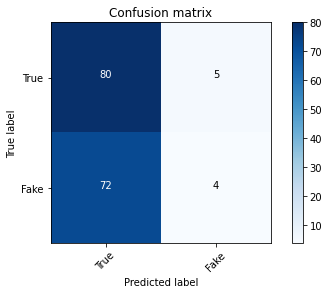

In [ ]:

cm3_rf = confusion_matrix(test3.label,test3.label_rf)       # RandomForest model
plot_confusion_matrix(cm3_rf,classes=['True','Fake'])

In [ ]:
accuracy_score(test3.label,test3.label_lr)      # Logistic Regression model


0.515527950310559

In [ ]:
print(classification_report(test3.label,test3.label_lr))      # Logistic Regression model
  

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        85
           1       0.48      0.38      0.43        76

    accuracy                           0.52       161
   macro avg       0.51      0.51      0.50       161
weighted avg       0.51      0.52      0.51       161



Confusion matrix, without normalization


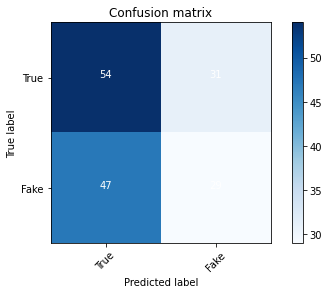

In [ ]:
cm3_lr = confusion_matrix(test3.label,test3.label_lr)       # Logistic Regression model
plot_confusion_matrix(cm3_lr,classes=['True','Fake'])

Test 4

In [ ]:

test4 = test4.dropna().reset_index(drop=True)
X4 = test4.text.values
X4_tfidf = tfidf_v.transform(X4).toarray()
test4['label_rf'] = rf_clf.predict(X4_tfidf)      # RandomForest model
test4['label_lr'] = lr.predict(X4_tfidf)          # Logistic Regression model
test4.head(10)

,title,text,subject,date,label,label_rf,label_lr
0,A MUST WATCH! “It’s Time To Show America Is Bi...,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,Government News,"Dec 21, 2016",1,1,1
1,Republicans may generate less heat at Miami de...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 10, 2016",0,0,0
2,BRILLIANT! TUCKER CARLSON and AYAAN HIRSI ALI ...,,left-news,"Mar 22, 2017",1,1,1
3,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",0,0,0
4,"Russia rebukes Trump over Iran, North Korea, a...",MOSCOW (Reuters) - Russia is extremely concer...,worldnews,"September 20, 2017",0,0,0
5,Puerto Rico debt fix unlikely to resemble Detr...,NEW YORK (Reuters) - The federal appointees ta...,politicsNews,"September 5, 2016",0,0,0
6,Britain will not speculate on possible U.S. wi...,LONDON (Reuters) - Britain will not speculate ...,worldnews,"October 12, 2017",0,0,0
7,WOW! KY Dem House Speaker Makes Insane Speech ...,State Reps Forced To Stand Awkwardly In Backgr...,politics,"Nov 5, 2015",1,1,1
8,CIA GATEKEEPER? CNN’s Chris Cuomo says America...,21st Century Wire says CNN s Chris Cuomo (ima...,Middle-east,"October 20, 2016",1,1,1
9,Trump Tells His Supporters Poor People Are To...,Alleged President Donald Trump has been on the...,News,"June 22, 2017",1,1,1


In [ ]:
accuracy_score(test4.label,test4.label_rf)      # RandomForest model
     

0.8830734966592427

In [ ]:
print(classification_report(test4.label,test4.label_rf))      # RandomForest model
     

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4284
           1       1.00      0.78      0.87      4696

    accuracy                           0.88      8980
   macro avg       0.90      0.89      0.88      8980
weighted avg       0.91      0.88      0.88      8980



Confusion matrix, without normalization


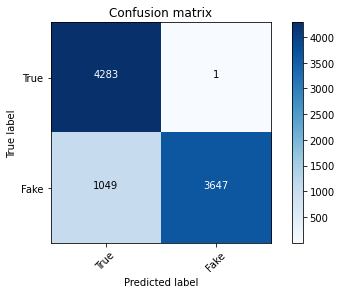

In [ ]:
cm4_rf = confusion_matrix(test4.label,test4.label_rf)       # RandomForest model
plot_confusion_matrix(cm4_rf,classes=['True','Fake'])

In [ ]:
accuracy_score(test4.label,test4.label_lr)      # Logistic Regression model

0.9699331848552338

In [ ]:
print(classification_report(test4.label,test4.label_lr))      # Logistic Regression model
     

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4284
           1       1.00      0.95      0.97      4696

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



Confusion matrix, without normalization


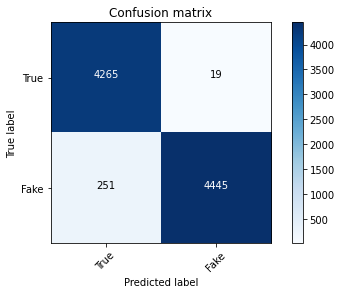

In [ ]:
cm4_lr = confusion_matrix(test4.label,test4.label_lr)       # Logistic Regression model
plot_confusion_matrix(cm4_lr,classes=['True','Fake'])

Conclusion
Logistic Regression model is performing very well as compared to Random Forest model .
Whether it is accuracy, recall, precision or the f1-score, Logistic Regression model yields the best results.
Use Cases
The model can be deployed on fact checking websites and apps.
The model can also be implemented in chat-apps in the form of Bot accounts.

In [ ]:
import pickle

In [77]:
import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']